# Simple vs Log Returns and Normality Assumptions

In this tutorial we try to understand the difference between simple returns and log returns. We also talk about normality of financial data!

If we want to model returns using the normal distribution!
SIMPLE RETURNS: The product of normally distributed variables is NOT normally distributed
LOG RETURNS: The sum of normally distributed variables DOES follow a normal distribution
Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

## Step 1: Import dependencies

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats 
# from pandas_datareader import data as pdr
import yfinance as yf
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

## Step 2: get stock market data
Choose a date range and select stock to chart.

In [14]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)
df = yf.download('CBA.AX', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,80.300003,80.330002,79.779999,80.220001,61.158566,1284609
2018-01-03,80.470001,80.644997,80.059998,80.139999,61.097572,1349269
2018-01-04,80.480003,80.480003,79.809998,79.970001,60.967968,1596303
2018-01-05,80.540001,81.250000,80.370003,81.160004,61.875210,2208531
2018-01-08,81.400002,81.750000,81.300003,81.620003,62.225895,1293549


# Simple vs Log Return

## Simple Return

Firstly one period simple returns

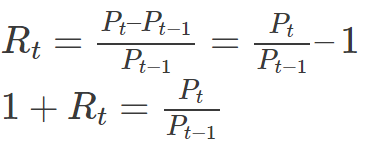

Calculate Daily Simple Returns

In [15]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-03   -0.000997
2018-01-04   -0.002121
2018-01-05    0.014881
2018-01-08    0.005668
2018-01-09    0.006984
                ...   
2023-09-27    0.004496
2023-09-28   -0.005769
2023-09-29    0.000200
2023-10-02   -0.001200
2023-10-03   -0.001602
Name: Close, Length: 1456, dtype: float64

For multi-period k returns

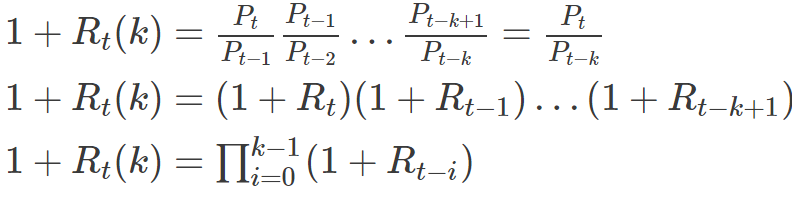

Plot financial data and look at first and last share prices

In [16]:
df.Close.plot().update_layout(autosize=False,width=500,height=300).show(renderer="colab")
print('First', df.Close[0], 'Last', df.Close[-1])

First 80.22000122070312 Last 99.69000244140625


Use simple returns & attempt to compute final price from starting price over time horizon



In [17]:
simple_returns.mean()
print("Arithmetic mean return is :", df.Close[0]*(1+simple_returns.mean())**len(simple_returns), "Don't Correct")
print("Geometric mean return is :", df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns]), "Correct")

Arithmetic mean return is : 117.25677605538716 Don't Correct
Geometric mean return is : 99.6900024414059 Correct


## Log Returns

Now onto one period log returns:

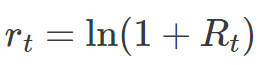

K-period log returns:

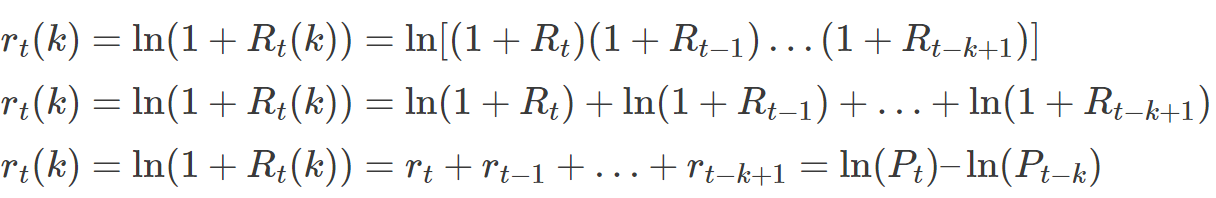

Compute log returns in python

In [19]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2018-01-03   -0.000998
2018-01-04   -0.002124
2018-01-05    0.014771
2018-01-08    0.005652
2018-01-09    0.006959
                ...   
2023-09-27    0.004486
2023-09-28   -0.005786
2023-09-29    0.000200
2023-10-02   -0.001201
2023-10-03   -0.001604
Name: Close, Length: 1456, dtype: float64

In [23]:
# Another solution
df.Close.pct_change().apply(lambda x: np.log(1+x)).dropna()

Date
2018-01-03   -0.000998
2018-01-04   -0.002124
2018-01-05    0.014771
2018-01-08    0.005652
2018-01-09    0.006959
                ...   
2023-09-27    0.004486
2023-09-28   -0.005786
2023-09-29    0.000200
2023-10-02   -0.001201
2023-10-03   -0.001604
Name: Close, Length: 1456, dtype: float64

In [20]:
log_returns.mean()
df.Close[0] * np.exp(len(log_returns) * log_returns.mean())

99.69000244140601